In [1]:
import cartopy

In [2]:
import xarray as xr
myPath = '/Users/leguillou/WORK/Developpement/'
import sys
sys.path.insert(0,myPath+'toolbox/')
sys.path.insert(0,myPath+'toolbox/xscale/')
import xscale
import numpy as np
import xscale.spectral.fft as xfft
from matplotlib.colors import LogNorm
import cmocean
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import Wavenum_freq_spec_func as wfs

In [7]:
## Dataset

dirtide = myPath + "DATA/eNATL60/hourly_outputs/"
dirnotide = myPath + "DATA/eNATL60/hourly_outputs/"



In [11]:

filesSSHtide = "eNATL60_GULFSTREAM_SSH.1h_y2009m10d01_y2009m12d31.nc"
filesSSHnotide = "eNATL60_noTides_GULFSTREAM_SSH.1h_y2009m10d01_y2009m12d31.nc"

tfilesSSHtide = dirtide+filesSSHtide
tfilesSSHnotide = dirtide+filesSSHnotide 

In [12]:
fSSHtide = xr.open_mfdataset(tfilesSSHtide)
SSHtide=fSSHtide['sossheig'][:]
navlat= fSSHtide['nav_lat']
navlon= fSSHtide['nav_lon']

fSSHnotide = xr.open_mfdataset(tfilesSSHnotide)
SSHnotide=fSSHnotide['sossheig'][:]
 


In [55]:
T=2*np.pi/(6E-5)

In [52]:
print(T)

104719.75511965976


In [43]:
wsshtide=SSHtide.window
wsshtide.set(n=48,dim='time_counter', cutoff=T/2)
SSHtidefilt=wsshtide.convolve()

In [44]:
wsshnotide=SSHnotide.window
wsshnotide.set(n=48,dim='time_counter', cutoff=T/2)
SSHnotidefilt=wsshnotide.convolve()

In [21]:
box=(-62,-60,34,37)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]


In [22]:

#ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = 0#where[0][ind[0]]
#ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = 300#where[0][ind[0]]
#ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = 0#where[1][ind[1]]
#ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = 300#where[1][ind[1]]

navlonbox = navlon[jmin:jmax+1,imin:imax+1] 
navlatbox = navlat[jmin:jmax+1,imin:imax+1] 

In [45]:
SSHtidefiltbox=SSHtidefilt[:,jmin:jmax+1,imin:imax+1] 

dx,dy = wfs.get_dx_dy(SSHtidefiltbox[0],navlon,navlat)
SSHtide_No_NaN = SSHtidefiltbox.interpolate_na(dim='y')
SSHtide_dtr = wfs.detrendn(SSHtide_No_NaN,axes=[0,1,2])
SSHtide_wdw = wfs.apply_window(SSHtide_dtr, SSHtide_dtr.dims, window_type='hanning')
SSHtidehat = xfft.fft(SSHtide_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
SSHtide_psd = xfft.psd(SSHtidehat)
SSHtide_frequency,kx,ky = wfs.get_f_kx_ky(SSHtidehat)
SSHtidefilt_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
SSHtidefilt_psd_np = SSHtide_psd.values
SSHtidefilt_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,SSHtidefilt_wavenumber,SSHtidefilt_psd_np)
 

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [46]:
SSHnotidefiltbox=SSHnotidefilt[:,jmin:jmax+1,imin:imax+1] 

dx,dy = wfs.get_dx_dy(SSHnotidefiltbox[0],navlon,navlat)
SSHnotide_No_NaN = SSHnotidefiltbox.interpolate_na(dim='y')
SSHnotide_dtr = wfs.detrendn(SSHnotide_No_NaN,axes=[0,1,2])
SSHnotide_wdw = wfs.apply_window(SSHnotide_dtr, SSHnotide_dtr.dims, window_type='hanning')
SSHnotidehat = xfft.fft(SSHnotide_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
SSHnotide_psd = xfft.psd(SSHnotidehat)
SSHnotide_frequency,kx,ky = wfs.get_f_kx_ky(SSHnotidehat)
SSHnotidefilt_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
SSHnotidefilt_psd_np = SSHnotide_psd.values
SSHnotidefilt_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,SSHnotidefilt_wavenumber,SSHnotidefilt_psd_np)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [29]:
SSHtidebox=SSHtide[:,jmin:jmax+1,imin:imax+1] 

dx,dy = wfs.get_dx_dy(SSHtidebox[0],navlon,navlat)
SSHtide_No_NaN = SSHtidebox.interpolate_na(dim='y')
SSHtide_dtr = wfs.detrendn(SSHtide_No_NaN,axes=[0,1,2])
SSHtide_wdw = wfs.apply_window(SSHtide_dtr, SSHtide_dtr.dims, window_type='hanning')
SSHtidehat = xfft.fft(SSHtide_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
SSHtide_psd = xfft.psd(SSHtidehat)
SSHtide_frequency,kx,ky = wfs.get_f_kx_ky(SSHtidehat)
SSHtide_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
SSHtide_psd_np = SSHtide_psd.values
SSHtide_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,SSHtide_wavenumber,SSHtide_psd_np)
 

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [30]:
SSHnotidebox=SSHnotide[:,jmin:jmax+1,imin:imax+1] 

dx,dy = wfs.get_dx_dy(SSHnotidebox[0],navlon,navlat)
SSHnotide_No_NaN = SSHnotidebox.interpolate_na(dim='y')
SSHnotide_dtr = wfs.detrendn(SSHnotide_No_NaN,axes=[0,1,2])
SSHnotide_wdw = wfs.apply_window(SSHnotide_dtr, SSHnotide_dtr.dims, window_type='hanning')
SSHnotidehat = xfft.fft(SSHnotide_wdw, dim=('time_counter', 'x', 'y'), dx={'x': dx, 'y': dx}, sym=True)
SSHnotide_psd = xfft.psd(SSHnotidehat)
SSHnotide_frequency,kx,ky = wfs.get_f_kx_ky(SSHnotidehat)
SSHnotide_wavenumber,kradial = wfs.get_wavnum_kradial(kx,ky)
SSHnotide_psd_np = SSHnotide_psd.values
SSHnotide_wavenum_freq_spectrum = wfs.get_f_k_in_2D(kradial,SSHnotide_wavenumber,SSHnotide_psd_np)
 

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [58]:
sec_to_hour = 3600.0
T=T/sec_to_hour/2
print(T)

0.0040401140092461325


Text(-0.32, 0.75, ' ')

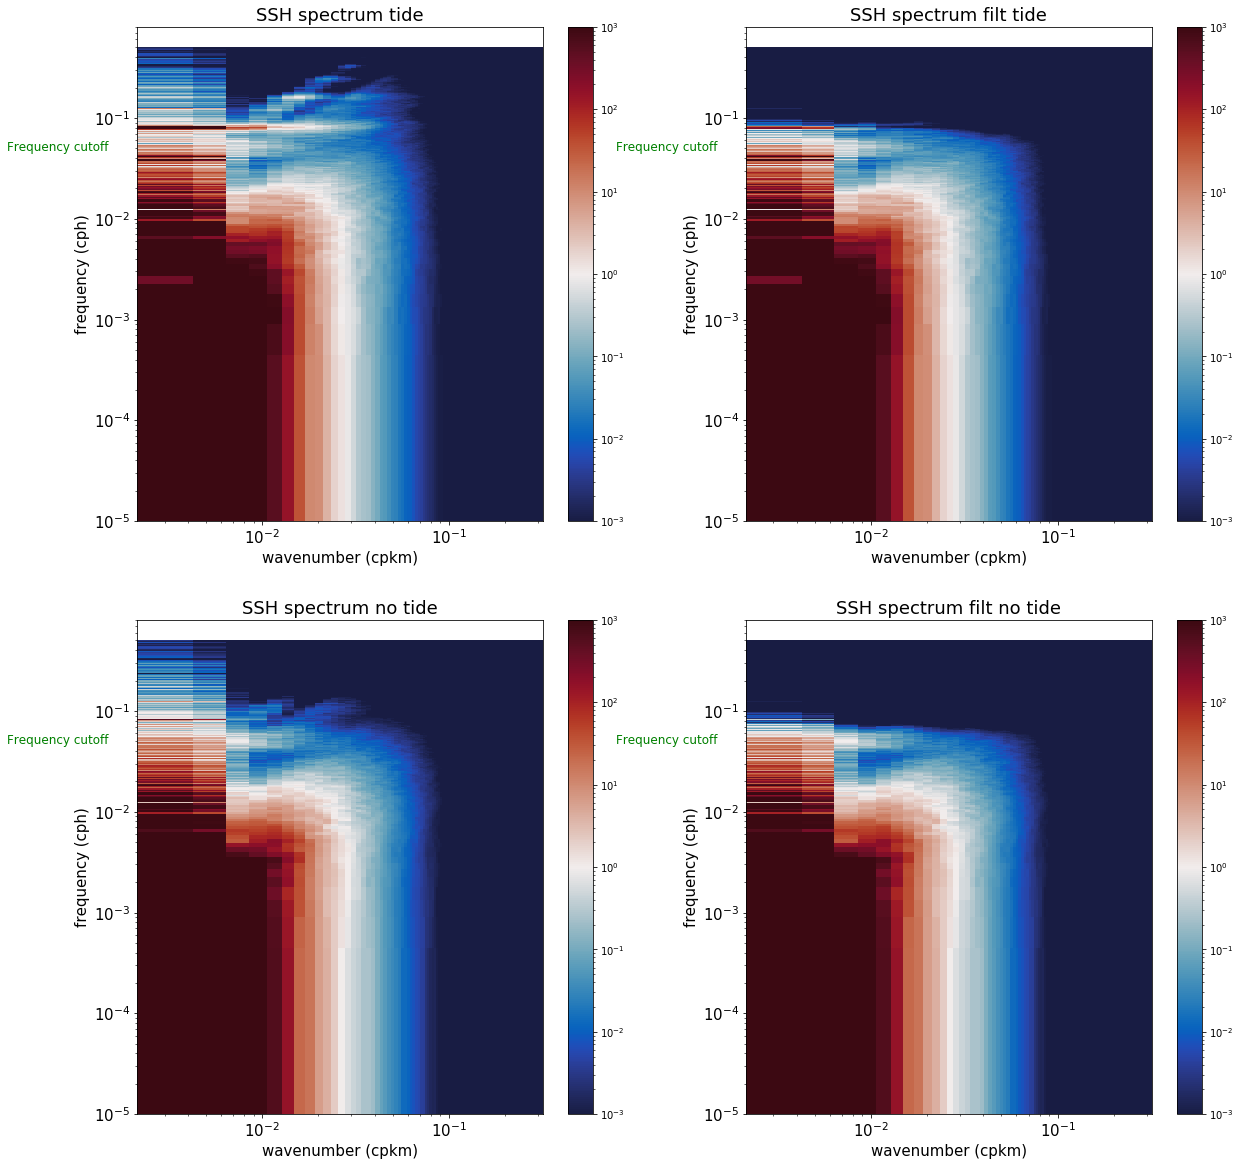

In [59]:

norm = LogNorm(vmin=0.001,vmax=1000)
cmap = cmocean.cm.balance

fig=plt.figure(figsize=(20,20))

ax = plt.subplot(221)
plt.pcolormesh(SSHtide_wavenumber,sec_to_hour*SSHtide_frequency,SSHtide_wavenum_freq_spectrum,norm=norm,cmap=cmap) 
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(SSHtide_wavenumber.min(),SSHtide_wavenumber.max())
ax.set_ylim(1E-5,8E-1)
plt.axhline(y=1/T,color='g', linewidth=3)
ax.set_title('SSH spectrum tide',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()
ax.text(-0.32, 0.75, "Frequency cutoff", transform=ax.transAxes,color='g',size=12)
ax.text(-0.32, 0.75, " ", transform=ax.transAxes,color='g',size=12) 

ax = plt.subplot(222)
plt.pcolormesh(SSHtidefilt_wavenumber,sec_to_hour*SSHtide_frequency,SSHtidefilt_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(SSHtidefilt_wavenumber.min(),SSHtidefilt_wavenumber.max())
ax.set_ylim(1E-5,8E-1)
ax.axhline(y=1/T,color='g',linewidth=3)
ax.set_title('SSH spectrum filt tide',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()
ax.text(-0.32, 0.75, "Frequency cutoff", transform=ax.transAxes,color='g',size=12)
ax.text(-0.32, 0.75, " ", transform=ax.transAxes,color='g',size=12)

ax = plt.subplot(223)
plt.pcolormesh(SSHnotide_wavenumber,sec_to_hour*SSHnotide_frequency,SSHnotide_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(SSHnotide_wavenumber.min(),SSHnotide_wavenumber.max())
ax.set_ylim(1E-5,8E-1)
plt.axhline(y=1/T,color='g', linewidth=3)
ax.set_title('SSH spectrum no tide',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()
ax.text(-0.32, 0.75, "Frequency cutoff", transform=ax.transAxes,color='g',size=12)
ax.text(-0.32, 0.75, " ", transform=ax.transAxes,color='g',size=12)

ax = plt.subplot(224)
plt.pcolormesh(SSHnotidefilt_wavenumber,sec_to_hour*SSHnotide_frequency,SSHnotidefilt_wavenum_freq_spectrum,norm=norm,cmap=cmap)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('wavenumber (cpkm)',fontsize=15)
ax.set_ylabel('frequency (cph)',fontsize=15)
ax.set_xlim(SSHnotidefilt_wavenumber.min(),SSHnotidefilt_wavenumber.max())
ax.set_ylim(1E-5,8E-1)
ax.axhline(y=1/T,color='g',linewidth=3)
ax.set_title('SSH spectrum filt no tide',size=18)
ax.tick_params(labelsize=15)
plt.colorbar()
ax.text(-0.32, 0.75, "Frequency cutoff", transform=ax.transAxes,color='g',size=12)#0.9 * Coriolis freq
ax.text(-0.32, 0.75, " ", transform=ax.transAxes,color='g',size=12)#0.5 * Coriolis freq

#plt.savefig("freq-wavenumb-diag-tide-notide-filt-nofilt.png")